In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv

 ## 1.	Data Understanding

In [2]:
## getting complaints data

In [3]:
with open(r"C:/Users/Admin/Desktop/Capstone/Ticket Classification/complaints.json", "r") as file:
    data = json.load(file)
data = data['data']

In [4]:
json_str = json.dumps(data)
json = pd.read_json(json_str)
json.to_csv('complaints.csv')

In [5]:
complains_data =  pd.read_csv('complaints.csv')

In [6]:
complains_data.drop(complains_data.columns[complains_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [7]:
complains_data.head()

,text,complaint_id
0,My daughters account keeps on getting charged ...,bc_2
1,I have to use paypal as part of their requirem...,bc_4
2,I am an international customer of Citi and hav...,bc_2
3,There were unauthorized transactions on my Wel...,bc_2
4,My bank card was kept at the NC branch of 5/3 ...,bc_2


In [8]:
## Getting Mapping json data

In [9]:
mapping_data = pd.read_json(r"C:/Users/Admin/Desktop/Capstone/Ticket Classification/mappings.json")
swapped_data = {v: k for k, v in mapping_data['all'].items()}
filename = 'mappings.csv'

fieldnames = ['complaint_id', 'complaint_title']

with open(filename, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header
    writer.writeheader()
    
    # Write the data
    for complaint_id, complaint_title in swapped_data.items():
        writer.writerow({'complaint_id': complaint_id, 'complaint_title': complaint_title})

print(f"Data has been successfully written to {filename}.")

Data has been successfully written to mappings.csv.


In [10]:
mappings_data = pd.read_csv('mappings.csv')

In [11]:
mappings_data.head()

,complaint_id,complaint_title
0,cc_7,APR or interest rate
1,bc_3,"Account opening, closing, or management"
2,cc_13,Advertising and marketing
3,cc_0,Billing disputes
4,cc_1,Cancelling account


In [12]:
## Merge data based upon same key for better visibility of data

In [13]:
merged_data = pd.merge(complains_data, mappings_data, on='complaint_id', how='left')

In [14]:
merged_data.head()

,text,complaint_id,complaint_title
0,My daughters account keeps on getting charged ...,bc_2,Using a debit or ATM card
1,I have to use paypal as part of their requirem...,bc_4,Deposits and withdrawals
2,I am an international customer of Citi and hav...,bc_2,Using a debit or ATM card
3,There were unauthorized transactions on my Wel...,bc_2,Using a debit or ATM card
4,My bank card was kept at the NC branch of 5/3 ...,bc_2,Using a debit or ATM card


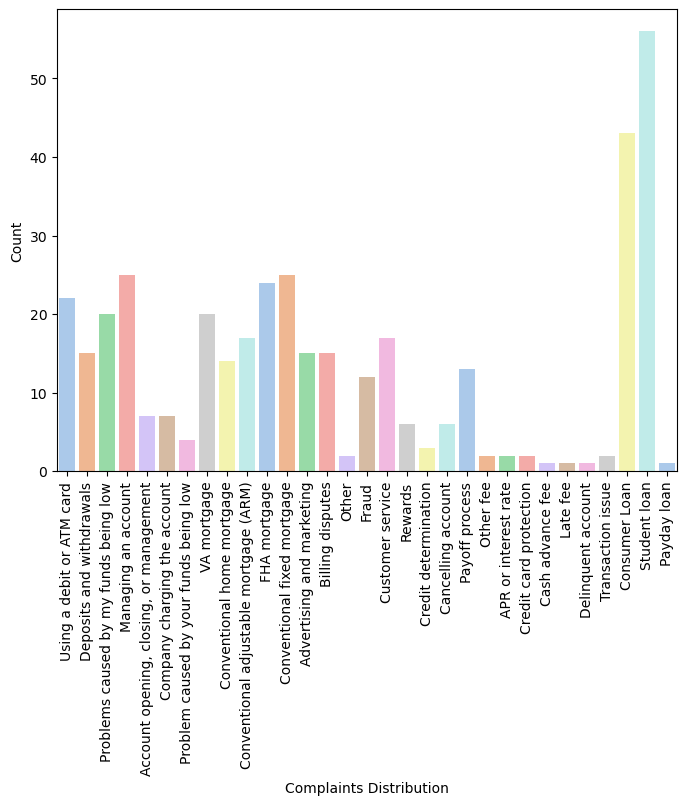

It clearly shows that Student Loan and Consumer loans are the winners and Its Imbalanced


In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='complaint_title', data=merged_data, palette='pastel')

# Add labels and title
plt.xlabel('Complaints Distribution')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show plot
plt.show()
print("It clearly shows that Student Loan and Consumer loans are the winners and Its Imbalanced")

In [16]:
## 1.1 Find out how many labelled customer complaints are in the data

In [17]:
num_labeled_complaints = merged_data['complaint_id'].notnull().sum()
num_labeled_complaints

400

Number of labeled customer complaints: 400

In [18]:
## 1.2 Find out the relative frequency of tags in the dataset

In [19]:
tag_frequency = merged_data['complaint_title'].value_counts()
relative_frequency = tag_frequency / num_labeled_complaints
print(relative_frequency)

Student loan                               0.1400
Consumer Loan                              0.1075
Managing an account                        0.0625
Conventional fixed mortgage                0.0625
FHA mortgage                               0.0600
Using a debit or ATM card                  0.0550
Problems caused by my funds being low      0.0500
VA mortgage                                0.0500
Conventional adjustable mortgage (ARM)     0.0425
Customer service                           0.0425
Deposits and withdrawals                   0.0375
Advertising and marketing                  0.0375
Billing disputes                           0.0375
Conventional home mortgage                 0.0350
Payoff process                             0.0325
Fraud                                      0.0300
Company charging the account               0.0175
Account opening, closing, or management    0.0175
Rewards                                    0.0150
Cancelling account                         0.0150


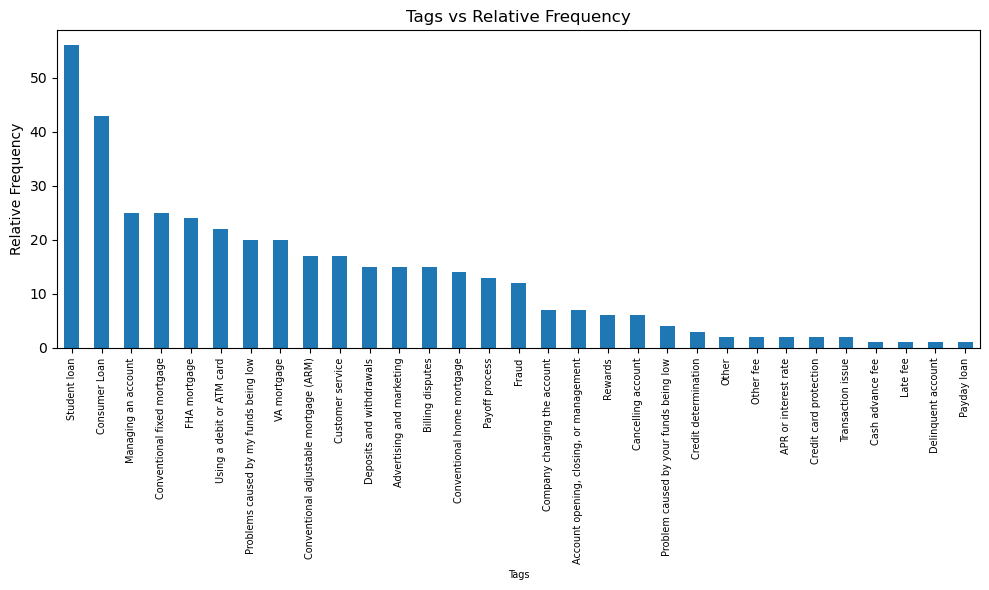

In [20]:
# Plotting the relative frequency of tags
plt.figure(figsize=(10, 6))
tag_frequency.plot(kind='bar')
plt.title('Tags vs Relative Frequency')
plt.xlabel('Tags', fontsize=7)
plt.ylabel('Relative Frequency')
plt.xticks(rotation=90,fontsize=7)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [21]:
## 1.3 Check if there are any encoding issues (try to read the data using open() and see if you need to use any special text encoding options, other than utf-8)

In [22]:
merged_data.to_csv('merged.csv')
file_path = 'merged.csv'

encodings_to_try = ['utf-8', 'latin1', 'utf-16', 'iso-8859-1']

for encoding in encodings_to_try:
    try:
        with open(file_path, 'r', encoding=encoding) as file:
            data = file.read()
        print(f"File read successfully with encoding: {encoding}")
    except Exception as e:
        print(f"Error reading file with encoding {encoding}: {e}")


File read successfully with encoding: utf-8
File read successfully with encoding: latin1
Error reading file with encoding utf-16: 'utf-16-le' codec can't decode byte 0x0a in position 287344: truncated data
File read successfully with encoding: iso-8859-1


In [23]:
## 1.4 Create a report that identifies how much of each complaint is composed of commonly used english stopwords

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')

def calculate_stopword_percentage(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    stop_words_in_text = [word for word in words if word in stop_words]
    return (len(stop_words_in_text) / len(words)) * 100 if len(words) > 0 else 0

merged_data['stopword_percentage'] = merged_data['text'].apply(calculate_stopword_percentage)
merged_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,complaint_id,complaint_title,stopword_percentage
0,My daughters account keeps on getting charged ...,bc_2,Using a debit or ATM card,47.115385
1,I have to use paypal as part of their requirem...,bc_4,Deposits and withdrawals,51.094891
2,I am an international customer of Citi and hav...,bc_2,Using a debit or ATM card,48.333333
3,There were unauthorized transactions on my Wel...,bc_2,Using a debit or ATM card,46.031746
4,My bank card was kept at the NC branch of 5/3 ...,bc_2,Using a debit or ATM card,47.517730


In [25]:
#min, max and mean stopwords%
merged_data['stopword_percentage'].min(),merged_data['stopword_percentage'].max(),merged_data['stopword_percentage'].mean()

(25.0, 60.29411764705882, 46.21712484100121)

In [26]:
import matplotlib.pyplot as plt

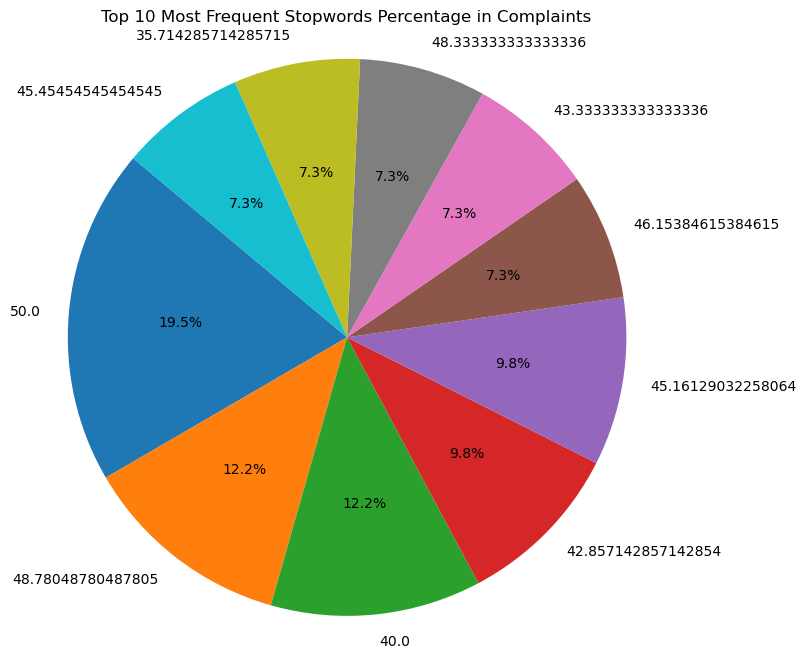

In [27]:
# Calculate the proportions of each category  
stopwords_proportions = merged_data['stopword_percentage'].value_counts(normalize=True)

# Slice to include only the top 10 categories
top_10_stopwords_proportions = stopwords_proportions.head(10)

# Create a pie plot for the top 10 categories
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(top_10_stopwords_proportions, labels=top_10_stopwords_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Frequent Stopwords Percentage in Complaints', fontsize=12)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [28]:
## Lets cleaned the data by removing common stop words so that we have better visibility of data
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

merged_data['cleaned_text'] = merged_data['text'].apply(remove_stopwords)
merged_data['text'] = merged_data['cleaned_text']
merged_data.drop(columns=['cleaned_text'], inplace=True)

def calculate_stopword_percentage(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    stop_words_in_text = [word for word in words if word in stop_words]
    return (len(stop_words_in_text) / len(words)) * 100 if len(words) > 0 else 0

merged_data['stopword_percentage'] = merged_data['text'].apply(calculate_stopword_percentage)
merged_data.head()

## Now we can clearly see, there are no stopwords present in data now

,text,complaint_id,complaint_title,stopword_percentage
0,daughters account keeps getting charged overdr...,bc_2,Using a debit or ATM card,0.0
1,use paypal part requirements . Paypal purchase...,bc_4,Deposits and withdrawals,0.0
2,international customer Citi Day Day Savings ac...,bc_2,Using a debit or ATM card,0.0
3,unauthorized transactions Wells Fargo debit ca...,bc_2,Using a debit or ATM card,0.0
4,bank card kept NC branch 5/3 Bank forgot passw...,bc_2,Using a debit or ATM card,0.0


In [29]:
## Let's Remove stopword percentage column as we dont have any stop words

In [30]:
merged_data.drop(columns=['stopword_percentage'],inplace=True)
merged_data.head()

,text,complaint_id,complaint_title
0,daughters account keeps getting charged overdr...,bc_2,Using a debit or ATM card
1,use paypal part requirements . Paypal purchase...,bc_4,Deposits and withdrawals
2,international customer Citi Day Day Savings ac...,bc_2,Using a debit or ATM card
3,unauthorized transactions Wells Fargo debit ca...,bc_2,Using a debit or ATM card
4,bank card kept NC branch 5/3 Bank forgot passw...,bc_2,Using a debit or ATM card


## 2.	Feature Engineering

In [31]:
## 2.1 Create a count matrix or a tfidf matrix

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_data['text'])

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (400, 3772)


In [33]:
## 2.2 We can do Sentiment Analysis 

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

merged_data['sentiment Score'] = merged_data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_data['sentiment_label'] = merged_data['sentiment Score'].apply(get_sentiment_label)

print("Below mentioned analysis helping us to find snetiments of each complaint")
merged_data.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Below mentioned analysis helping us to find snetiments of each complaint


,text,complaint_id,complaint_title,sentiment Score,sentiment_label
0,daughters account keeps getting charged overdr...,bc_2,Using a debit or ATM card,-0.8331,Negative
1,use paypal part requirements . Paypal purchase...,bc_4,Deposits and withdrawals,0.4939,Positive
2,international customer Citi Day Day Savings ac...,bc_2,Using a debit or ATM card,0.1969,Positive
3,unauthorized transactions Wells Fargo debit ca...,bc_2,Using a debit or ATM card,0.9246,Positive
4,bank card kept NC branch 5/3 Bank forgot passw...,bc_2,Using a debit or ATM card,0.6908,Positive


In [35]:
## wordcloud unigrama and bigram

In [36]:
from wordcloud import WordCloud
from nltk import bigrams,ngrams, word_tokenize

In [37]:
## Unigram 

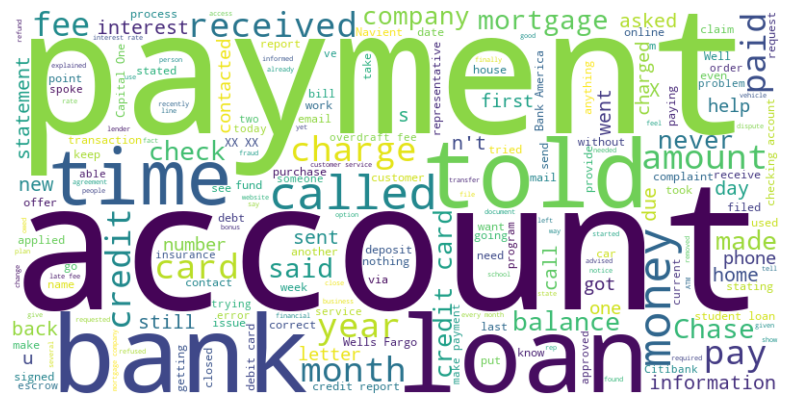

As per unigram analysis we can see data revolve around Payment,Account,Loan,Money etc


In [38]:
unigrams = []
for text in merged_data['text']:
    tokens = word_tokenize(text)
    unigrams.extend(tokens)

# Join all the words into a single string
unigram_text = ' '.join(unigrams)
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unigram_text)

# Display the word cloud
#plt.title("Using Unigram we are providing insights into the content, structure, and characteristics of textual data. In that case we see data revolve around Payment,Loan, Bank,Account")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.text(10,10,"As per unigram analysis we can see data revolve around Payment,Account,Loan,Money", fontsize=12, fontweight='bold', ha='center')
plt.show()
print('As per unigram analysis we can see data revolve around Payment,Account,Loan,Money etc')

In [39]:
## Bigram analysis for enhanced view

In [40]:
bigrams_list = list(nltk.bigrams(merged_data['text']))
bigrams = [' '.join(tup) for tup in bigrams_list]
bigrams[:10]

["daughters account keeps getting charged overdraft fee account . claim Internet transaction made debit day transaction . also state merchant days submit debit get paid . bank never puts hold transaction subsequently charges overdraft fee . also say ca n't tell Internet transaction completed . complained X unauthorized debit account took time investigate RIDICULOUS . use paypal part requirements . Paypal purchase something takes money immediately bank account . However depositing take sometimes 6 days falls weekend . credit union holds money sometimes day . buy sell money hand hurting cash flow . believe holding money significant drag economy justification long delay . banks also wiring money bank bank processing refund debit card . law limits . anything speed process . Thank",
 'use paypal part requirements . Paypal purchase something takes money immediately bank account . However depositing take sometimes 6 days falls weekend . credit union holds money sometimes day . buy sell money 

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(bigrams)
sum_words = bag_of_words.sum(axis=0)
bi_freq = [(wrd, sum_words[0, i]) for wrd, i in vectorizer.vocabulary_.items()]
bi_freq = sorted(bi_freq, key=lambda x: x[1], reverse=True)
bi_freq[:10]

[('credit card', 168),
 ('xx xx', 102),
 ('credit report', 94),
 ('checking account', 82),
 ('wells fargo', 80),
 ('capital one', 66),
 ('debit card', 64),
 ('bank america', 64),
 ('customer service', 54),
 ('mortgage company', 50)]

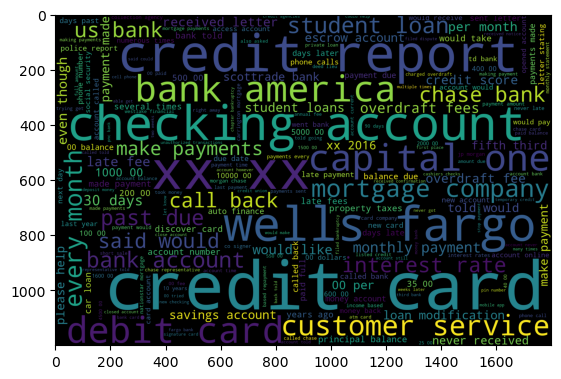

In [42]:
bi_dict = dict(bi_freq)
wrd_cld_bi = WordCloud(width=1800, height=1200)
wrd_cld_bi.generate_from_frequencies(bi_dict)
plt.imshow(wrd_cld_bi)

In [43]:
merged_data.head()

,text,complaint_id,complaint_title,sentiment Score,sentiment_label
0,daughters account keeps getting charged overdr...,bc_2,Using a debit or ATM card,-0.8331,Negative
1,use paypal part requirements . Paypal purchase...,bc_4,Deposits and withdrawals,0.4939,Positive
2,international customer Citi Day Day Savings ac...,bc_2,Using a debit or ATM card,0.1969,Positive
3,unauthorized transactions Wells Fargo debit ca...,bc_2,Using a debit or ATM card,0.9246,Positive
4,bank card kept NC branch 5/3 Bank forgot passw...,bc_2,Using a debit or ATM card,0.6908,Positive


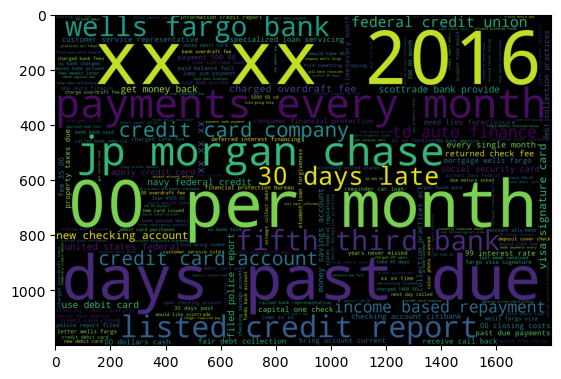

In [44]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming merged_data['text'] contains your text data

# Generate trigrams
trigrams_list = list(nltk.trigrams(merged_data['text']))
trigrams = [' '.join(tup) for tup in trigrams_list]

# Create the CountVectorizer for trigrams
vectorizer_tri = CountVectorizer(ngram_range=(3, 3))
bag_of_words_tri = vectorizer_tri.fit_transform(trigrams)

# Calculate word frequencies
sum_words_tri = bag_of_words_tri.sum(axis=0)
tri_freq = [(wrd, sum_words_tri[0, i]) for wrd, i in vectorizer_tri.vocabulary_.items()]
tri_freq = sorted(tri_freq, key=lambda x: x[1], reverse=True)

# Generate WordCloud
tri_dict = dict(tri_freq)
wrd_cld_tri = WordCloud(width=1800, height=1200)
wrd_cld_tri.generate_from_frequencies(tri_dict)
plt.imshow(wrd_cld_tri)


## 3. Modeling

In [45]:
## Naive Bayes

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [47]:
X = merged_data['text']
y = merged_data['complaint_id']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test_counts)

## Calculate recall
nb_recall = recall_score(y_test, predictions, average='macro')
print("Recall: ",nb_recall)
# Calculate Precision
nb_precision = precision_score(y_test, predictions, average='macro')
print("Precision: ", nb_precision)
# Calculate accuracy
knn_accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", knn_accuracy)


Recall:  0.2237577639751553
Precision:  0.2474597865902214
Accuracy: 0.35


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
## KNN implementation

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the k-NN model
k = 3  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_tfidf, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test_tfidf)

## Calculate recall
knn_recall = recall_score(y_test, predictions, average='macro')
print("Recall: ",knn_recall)
# Calculate Precision
knn_precision = precision_score(y_test, predictions, average='macro')
print("Precision: ", knn_precision)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", knn_accuracy)

Recall:  0.20922619047619043
Precision:  0.17822871572871576
Accuracy: 0.325


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

In [51]:
## SVM implementation

In [52]:
from sklearn.svm import SVC

In [53]:
# Preprocessing
# Removing punctuation and lowercasing
merged_data['text'] = merged_data['text'].str.replace(r'[^\w\s]', '').str.lower()

# Splitting data into features and target
X = merged_data['text']
y = merged_data['complaint_id']

# Vectorizing text data using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Training SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions
svm_pred = svm_model.predict(X_test)

# Evaluating the model
## Calculate recall
svm_recall = recall_score(y_test, svm_pred, average='macro')
print("Recall: ",svm_recall)
# Calculate Precision
svm_precision = precision_score(y_test, svm_pred, average='macro')
print("Precision: ", svm_precision)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy:", svm_accuracy)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8640\570917058.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data['text'] = merged_data['text'].str.replace(r'[^\w\s]', '').str.lower()


Recall:  0.2388392857142857
Precision:  0.25328703703703703
Accuracy: 0.4


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
## Deep learning based technique

In [55]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [56]:
# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(merged_data['text'])
X = tokenizer.texts_to_sequences(merged_data['text'])

# Pad sequences to ensure uniform length
maxlen = max(len(x) for x in X)
X = pad_sequences(X, maxlen=maxlen)

# Convert labels to one-hot encoding
labels = pd.get_dummies(merged_data['complaint_id']).values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=maxlen))
model.add(LSTM(100))
model.add(Dense(len(labels[0]), activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", accuracy)

Epoch 1/10
10/10 - 5s - loss: 3.4205 - accuracy: 0.0906 - 5s/epoch - 478ms/step
Epoch 2/10
10/10 - 1s - loss: 3.2001 - accuracy: 0.1437 - 980ms/epoch - 98ms/step
Epoch 3/10
10/10 - 1s - loss: 3.0208 - accuracy: 0.1656 - 913ms/epoch - 91ms/step
Epoch 4/10
10/10 - 1s - loss: 2.9839 - accuracy: 0.1437 - 956ms/epoch - 96ms/step
Epoch 5/10
10/10 - 1s - loss: 2.9396 - accuracy: 0.1437 - 785ms/epoch - 78ms/step
Epoch 6/10
10/10 - 1s - loss: 2.8964 - accuracy: 0.1500 - 1s/epoch - 107ms/step
Epoch 7/10
10/10 - 1s - loss: 2.7926 - accuracy: 0.2094 - 920ms/epoch - 92ms/step
Epoch 8/10
10/10 - 1s - loss: 2.5429 - accuracy: 0.2688 - 925ms/epoch - 92ms/step
Epoch 9/10
10/10 - 1s - loss: 2.2129 - accuracy: 0.4000 - 925ms/epoch - 93ms/step
Epoch 10/10
10/10 - 1s - loss: 1.8228 - accuracy: 0.5688 - 783ms/epoch - 78ms/step
Accuracy: 0.22499999403953552


In [57]:
## yes we can implement K mean clustering on this data

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [59]:
# Text preprocessing
# You can customize this preprocessing based on your specific requirements
# For now, let's convert text to lowercase and remove punctuation
merged_data['text'] = merged_data['text'].str.lower().str.replace('[^\w\s]', '')

# Vectorize text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(merged_data['text'])

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(X)

# Print cluster centers
print("Cluster centers:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(optimal_num_clusters):
    print(f"Cluster {i}: ", end='')
    for ind in order_centroids[i, :10]:
        print(f'{terms[ind]}', end=', ')
    print()

# Print assigned clusters for each complaint
print("\nAssigned clusters for each complaint:")
print(merged_data[['text', 'cluster']])

# Print silhouette score
print("\nSilhouette score:", max(silhouette_scores))

C:\Users\Admin\AppData\Local\Temp\ipykernel_8640\260556441.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data['text'] = merged_data['text'].str.lower().str.replace('[^\w\s]', '')


Cluster centers:
Cluster 0: loan, payment, payments, mortgage, interest, credit, company, would, due, month, 
Cluster 1: account, bank, card, credit, chase, money, check, would, told, fee, 

Assigned clusters for each complaint:
                                                  text  cluster
0    daughters account keeps getting charged overdr...        1
1    use paypal part requirements  paypal purchase ...        1
2    international customer citi day day savings ac...        1
3    unauthorized transactions wells fargo debit ca...        1
4    bank card kept nc branch 53 bank forgot passwo...        1
..                                                 ...      ...
395  paid   1700000  loan 11 years  got divorced ge...        0
396   called sallie mae see could offer sort loan m...        0
397   graduated back xxxx number financial ups down...        0
398  loan held navient work field 19 years  time at...        0
399  set payment interest payment one loan paid eve...        0

[4

In [72]:
## lets try decision tree for classification

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
# Preprocess text data
# For simplicity, let's use CountVectorizer for feature extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(merged_data['text'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, merged_data['complaint_title'], test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
## Calculate recall
dt_recall = recall_score(y_test, y_pred, average='macro')
print("Recall: ",dt_recall)
# Calculate Precision
dt_precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ", dt_precision)

Accuracy: 0.25
Recall:  0.12426739926739928
Precision:  0.1253169907016061


In [75]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC()

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_clf.predict(X_test)

# Evaluate model performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("LinearSVC Accuracy:", svm_accuracy)

LinearSVC Accuracy: 0.4


In [76]:
# Import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Initialize ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier(random_state=42)

# Train the classifier
extra_trees_clf.fit(X_train, y_train)

# Make predictions
extra_trees_y_pred = extra_trees_clf.predict(X_test)

# Evaluate model performance
extra_trees_accuracy = accuracy_score(y_test, extra_trees_y_pred)
print("ExtraTreesClassifier Accuracy:", extra_trees_accuracy)

ExtraTreesClassifier Accuracy: 0.35


### Model Performance Evaluation

In [71]:
Model_Performance = {
    'Models' : ['Naive Bayes','KNN','SVM', 'LSTM','K Means'],
    'Recall' : [22,21,24,0,0],
    'Precision' : [25,18,25,0,0],
    'Accuracy' : [35,33,40,22,0],
    'Silhouette_score' : [0,0,0,0,0.8]
}

Performance_df = pd.DataFrame(Model_Performance)
Performance_df

,Models,Recall,Precision,Accuracy,Silhouette_score
0,Naive Bayes,22,25,35,0.00
1,KNN,21,18,33,0.00
2,SVM,24,25,40,0.00
3,LSTM,0,0,22,0.00
4,K Means,0,0,0,0.80


## Now all above model does not give good accuracy. Lets try Lazy Classifiers

In [60]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [61]:
merged_data.drop(columns="sentiment Score",inplace=True)
merged_data.head()

,text,complaint_id,complaint_title,sentiment_label,cluster
0,daughters account keeps getting charged overdr...,bc_2,Using a debit or ATM card,Negative,1
1,use paypal part requirements paypal purchase ...,bc_4,Deposits and withdrawals,Positive,1
2,international customer citi day day savings ac...,bc_2,Using a debit or ATM card,Positive,1
3,unauthorized transactions wells fargo debit ca...,bc_2,Using a debit or ATM card,Positive,1
4,bank card kept nc branch 53 bank forgot passwo...,bc_2,Using a debit or ATM card,Positive,1


In [62]:
# Split data into features and target
y = merged_data['complaint_title']
X = merged_data.drop(columns=['complaint_title'])

In [63]:
X.isnull().sum()

text               0
complaint_id       0
sentiment_label    0
cluster            0
dtype: int64

In [64]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn import datasets 
from sklearn.utils import shuffle 
import numpy as np 

# Importing LazyRegressor 
from lazypredict.Supervised import LazyClassifier

In [66]:
classifier = LazyClassifier(verbose=0, 
                    ignore_warnings=False, 
                    custom_metric=None) 
  
# fitting data in LazyClassifier 
models, predictions = classifier.fit(X_train, X_test, 
                              y_train, y_test) 
# lets check which model did better 
print(models)

  7%|█████▋                                                                             | 2/29 [00:00<00:06,  4.20it/s]

AdaBoostClassifier model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   3000000  d

 21%|█████████████████▏                                                                 | 6/29 [00:01<00:06,  3.66it/s]

CalibratedClassifierCV model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   300000

 28%|██████████████████████▉                                                            | 8/29 [00:01<00:04,  5.21it/s]

DummyClassifier model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   3000000  doll

 41%|█████████████████████████████████▉                                                | 12/29 [00:02<00:02,  7.47it/s]

ExtraTreesClassifier model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   3000000 

 48%|███████████████████████████████████████▌                                          | 14/29 [00:02<00:01,  7.56it/s]

LinearDiscriminantAnalysis model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   30

LinearSVC model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   3000000  dollars  b

 59%|████████████████████████████████████████████████                                  | 17/29 [00:03<00:01,  6.36it/s]

LogisticRegression model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   3000000  d

 66%|█████████████████████████████████████████████████████▋                            | 19/29 [00:03<00:01,  7.80it/s]

PassiveAggressiveClassifier model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   3

 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [00:03<00:00, 10.00it/s]

RandomForestClassifier model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   300000

SVC model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   3000000  dollars  bank ma

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] Start training from score -5.075174
[LightGBM] [Info] Start training from score -4.158883
[LightGBM] [Info] Start training from score -3.283414
[LightGBM] [Info] Start training from score -3.370426
[LightGBM] [Info] Start training from score -4.382027
[LightGBM] [Info] Start training from score -5.768321
[LightGBM] [Info] Start training from score -4.158883
[LightGBM] [Info] Start training from score -2.184802
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -2.723799
[LightGBM] [Info] Start training from score -3.370426
[LightGBM] [Info] Start training from score -5.075174
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.65it/s]

LGBMClassifier model failed to execute
Found unknown categories ['ladies gentleme n  caliber home loan mortgage company tx  california  programmed mortgage application back send required consumer notices onc e caliber h points data consumer applying new loan  pleased found programmers  regards ', ' car loan fifth third bank honestly say regret going loan  never much trouble bank  recently got married last name change  therefore also switched insurance companies  sent letter stating needed updated insurance policy  initial thought big deal fax copy  called make sure correct fax number let know would reflect new last name one system  everything else car insured  looked policy number try link insurance instead faxing   thought would easier went  however  tell insurance policy active insurance   know true since everything front proving  make monthly payments   said call insurance co ', 'parents bank well known bank name fear retribution  name account  parents scammed close   3000000  dolla

In [68]:
#performance matrix comparision
#ROC curve within single